#EDA

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)


In [60]:
from google.colab import files 
files.upload()

Saving vgames2.csv to vgames2 (1).csv


{'vgames2.csv': b'"","Name","Platform","Year","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales"\n"1","Candace Kane\'s Candy Factory","DS","2008","Action","Destineer","0.04","0","0","0"\n"2","The Munchables","Wii","2009","Action","Namco Bandai Games","0.17","0","0","0.01"\n"3","Otome wa Oanesama Boku ni Koi Shiteru Portable","PSP","2010","Adventure","Alchemist","0","0","0.02","0"\n"4","Deal or No Deal: Special Edition","DS","2010","Misc","Zoo Games","0.04","0","0","0"\n"5","Ben 10 Ultimate Alien: Cosmic Destruction","PS3","2010","Platform","D3Publisher","0.12","0.09","0","0.04"\n"6","Power Pro Kun Pocket 8","DS","2005","Sports","Konami Digital Entertainment","0","0","0.14","0"\n"7","JASF: Jane\'s Advanced Strike Fighters","PC","2011","Simulation","Deep Silver","0.02","0.01","0","0"\n"8","Samurai Warriors: State of War","PSP","2005","Action","Tecmo Koei","0.07","0","0.11","0.01"\n"9","Imabikisou","PS3","2007","Adventure","Sega","0","0","0.04","0"\n"10","The Penguins of M

In [61]:
df= pd.read_csv("vgames2.csv")
df=df.iloc[:, 1:]
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [62]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [63]:
# 결측치 확인 
df.isnull().sum()

#Year Genre Publisher 결측값

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [64]:
# insull indexing 통해 nan값 있는 행 불러오기

missing_df=df[df.isnull().any(axis=1)]
missing_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
...,...,...,...,...,...,...,...,...,...
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16431,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0,0,0.01
16432,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01
16555,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01


In [65]:
# sales의 K, M 값 바꾸기 

#첫 번째 컬럼 삭제
df=pd.read_csv('vgames2.csv').iloc[:, 1:]

# 판매량 컬럼들 정의하기

sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

#k, m 대체하고 데이터형 변환
for sale in sales_columns:
  df[sale]=df[sale].str.replace('K', 'e-3').str.replace('M', '').astype(float)

df.describe(include='all')
#df.to_csv('missing_df.csv', index=False)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16598,16598,16327.000000,16548,16540,16598.000000,16598.000000,16598.000000,16598.000000
unique,11493,31,NaN,12,578,NaN,NaN,NaN,NaN
top,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN
freq,12,2163,NaN,3305,1351,NaN,NaN,NaN,NaN
mean,NaN,NaN,1994.242543,NaN,NaN,0.264667,0.146652,0.077782,0.048063
std,NaN,NaN,155.077168,NaN,NaN,0.816683,0.505351,0.309291,0.188588
min,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000


# 연도표기 수정

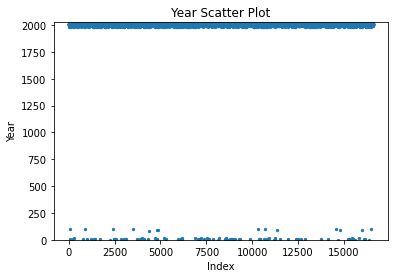

In [66]:
plt.scatter(range(df.shape[0]), df['Year'], s=5)

# y-axis limits
plt.ylim(0,2025)

plt.title('Year Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Year')

plt.show()

250 이하의 연도 존재 

In [67]:
#year 표기 오류 수정
df.loc[(df['Year']>=50)&(df['Year']<=99), 'Year']+=1900
df.loc[df['Year']<50, 'Year']+=2000


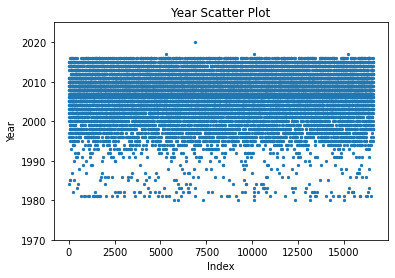

In [68]:
plt.scatter(range(df.shape[0]), df['Year'], s=5)

plt.ylim(1970, 2025)

plt.title('Year Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Year')

plt.show()

In [69]:
df.describe() #연도 최소 최대값 정상 범주

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063
std,5.828981,0.816683,0.505351,0.309291,0.188588
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [70]:
#2017~2020년도 데이터 부족해 삭제
df=df[df['Year']<2016]


# 전체적인 판매량 그려보기


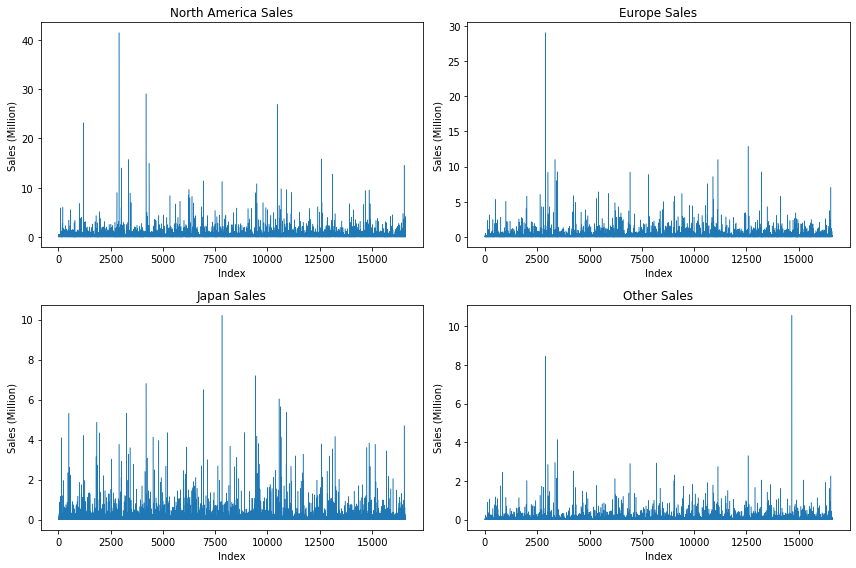

In [71]:
fig, axs= plt.subplots(2,2, figsize=(12,8))

#NA_Sales column in the top left subplot
axs[0,0].plot(df['NA_Sales'], linewidth=0.5)
axs[0,0].set_xlabel('Index')
axs[0,0].set_ylabel('Sales (Million)')
axs[0,0].set_title('North America Sales')

#EU_Sales column in the top rightt subplot
axs[0,1].plot(df['EU_Sales'], linewidth=0.5)
axs[0,1].set_xlabel('Index')
axs[0,1].set_ylabel('Sales (Million)')
axs[0,1].set_title('Europe Sales')


#JP_Sales column in the bottom left subplot
axs[1,0].plot(df['JP_Sales'], linewidth=0.5)
axs[1,0].set_xlabel('Index')
axs[1,0].set_ylabel('Sales (Million)')
axs[1,0].set_title('Japan Sales')

#Other_Sales column in the bottom right subplot
axs[1,1].plot(df['Other_Sales'], linewidth=0.5)
axs[1,1].set_xlabel('Index')
axs[1,1].set_ylabel('Sales (Million)')
axs[1,1].set_title('Other Sales')

plt.tight_layout()
plt.show()

In [72]:
df[df['NA_Sales']>1]

#백만개 이상 팔린 게임이 북미에 900개 가량 있다

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
107,Madden NFL 2001,PS2,2000.0,Sports,Electronic Arts,1.19,0.07,0.05,0.20
122,Call of Duty 4: Modern Warfare,X360,2007.0,Shooter,Activision,5.91,2.38,0.13,0.90
126,Mortal Kombat,PS3,2011.0,Fighting,Warner Bros. Interactive Entertainment,1.98,0.55,0.00,0.32
165,Burnout 3: Takedown,PS2,2004.0,Racing,Electronic Arts,1.23,1.11,0.00,0.34
192,Left 4 Dead 2,X360,2009.0,Shooter,Electronic Arts,2.67,0.89,0.05,0.37
...,...,...,...,...,...,...,...,...,...
16544,Spider-Man 2,PS2,2004.0,Action,Activision,1.75,1.20,0.02,0.43
16552,Left 4 Dead,X360,2008.0,Shooter,Electronic Arts,2.66,0.50,0.05,0.30
16573,Finding Nemo,PS2,2003.0,Action,THQ,1.26,0.60,0.05,0.18
16587,Need for Speed Underground 2,XB,2004.0,NaN,Electronic Arts,1.38,0.80,0.00,0.10


In [73]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [74]:

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
for col in df.columns:
  print(df[col].value_counts())
  print()




# Name columns 데이터- 게임 이름 중복항목이 너무 많다
# platform 모르는 구성 많고 낮은 숫자는 제외 ?
# genre 12개 항목으로 나뉘어 있음
# 500개 넘는 publisher 존재, 상위항목으로 잘라야할 듯

Need for Speed: Most Wanted            12
Ratatouille                             9
LEGO Marvel Super Heroes                9
FIFA 14                                 9
Madden NFL 07                           8
                                       ..
Model * Oshare Audition: Dream Girl     1
Twisted Metal 2                         1
Blazing Souls: Accelate                 1
ESPN Final Round Golf 2002              1
Rainbow Islands: Revolution             1
Name: Name, Length: 11163, dtype: int64

DS      2132
PS2     2127
Wii     1290
PS3     1272
X360    1227
        ... 
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, Length: 31, dtype: int64

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
          ... 
1990.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year, Length: 36, dtype: int64

Action          3122
Sports          2261
Misc            1687
Role-Playing    1424
Shooter         1248
    

In [75]:
# 결측치- 대세에 영향 주지 않는 정도의 데이터로 판단하여 삭제
df.isnull().sum()

df=df.dropna()
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


#플랫폼 정리

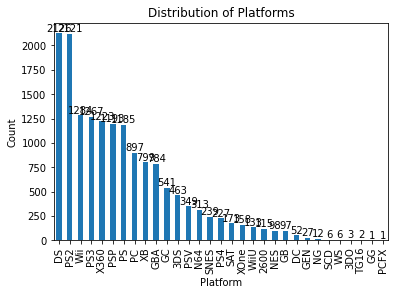

In [76]:
# 플랫폼 시각화 
platform_counts= df['Platform'].value_counts()
ax=platform_counts.plot(kind='bar')

plt.xlabel('Platform')
plt.ylabel('Count')
plt.title('Distribution of Platforms')

# add labels to the bars
for i , val in enumerate(platform_counts.values):
  ax.annotate(str(val), xy=(i, val), ha='center', va='bottom') #ha- 수평방향 정렬 va- 수직방향 정렬

plt.show()

In [77]:
# 플랫폼들을 카테고리로 묶기 
platform_categories = {'PS': 'PlayStation',
                       'PS2': 'PlayStation',
                       'PS3': 'PlayStation',
                       'PS4': 'PlayStation',
                       'PSV': 'PlayStation',
                       'PSP': 'PlayStation',
                       'XB': 'Xbox',
                       'X360': 'Xbox',
                       'XOne': 'Xbox',
                       'DS': 'Nintendo',
                       'Wii': 'Nintendo',
                       'GBA': 'Nintendo',
                       'GB': 'Nintendo',
                       'GC': 'Nintendo',
                       '3DS': 'Nintendo',
                       'NES': 'Nintendo',
                       'N64': 'Nintendo',
                       'SNES': 'Nintendo',
                       'WiiU': 'Nintendo',
                       'PC': 'PC',
                       '2600': 'Other',
                       'SAT': 'Other',
                       'DC': 'Other',
                       'SCD': 'Other',
                       'WS': 'Other',
                       'NG': 'Other',
                       'TG16': 'Other',
                       '3DO': 'Other',
                       'GG': 'Other',
                       'GEN': 'Other',
                       'PCFX': 'Other'}

# 플랫폼들의 이름을 카테고리 이름으로 대체
df['Platform']=df['Platform'].replace(platform_categories)
df                       


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,Nintendo,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Nintendo,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PlayStation,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,Nintendo,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PlayStation,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,Nintendo,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PlayStation,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PlayStation,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PlayStation,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [78]:
df['Platform'].value_counts()



PlayStation    6342
Nintendo       6078
Xbox           2180
PC              897
Other           398
Name: Platform, dtype: int64

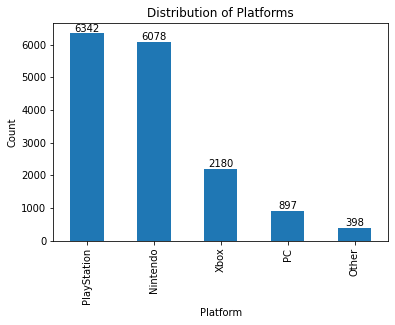

In [79]:
platform_counts=df['Platform'].value_counts()
ax=platform_counts.plot(kind='bar')

plt.xlabel('Platform')
plt.ylabel('Count')
plt.title('Distribution of Platforms')

#add labels to the bars
for i, val in enumerate(platform_counts.values):
  ax.annotate(str(val), xy=(i, val), ha='center', va='bottom')

plt.show()

# playstation과 nintendo 양이 압도적인 것을 확인

# 출판사 정리

In [80]:
df['Publisher'].value_counts()

Electronic Arts                 1312
Activision                       949
Ubisoft                          899
Namco Bandai Games               884
Konami Digital Entertainment     813
                                ... 
Nichibutsu                         1
Graphsim Entertainment             1
Merscom LLC                        1
Quintet                            1
Mystique                           1
Name: Publisher, Length: 563, dtype: int64

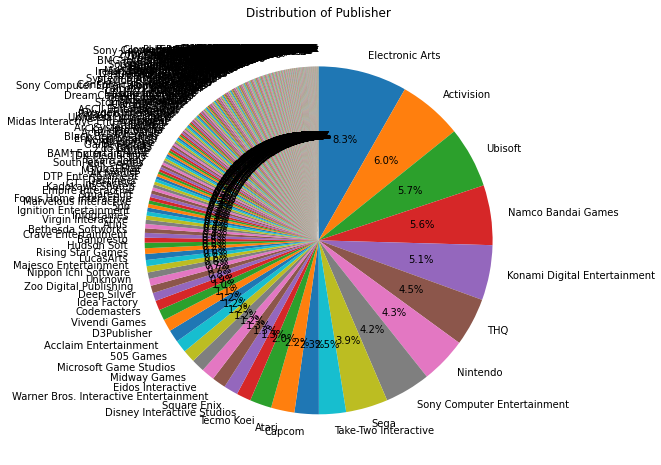

In [81]:
import matplotlib.pyplot as plt

publisher_counts=df['Publisher'].value_counts()
labels=publisher_counts.index.tolist()
values=publisher_counts.values.tolist()

fig,ax=plt.subplots(figsize=(8,8))

ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False)

ax.set_title('Distribution of Publisher')

plt.show()

In [82]:
# 상위 30개 출판사만 이용
# 가설.. 어떻게 사용하지 
# 하위 출판사는 판매량에 큰 관여 못했을 거라 판단

top30_pubs=df['Publisher'].value_counts()[:30]
top30_pubs

Electronic Arts                 1312
Activision                       949
Ubisoft                          899
Namco Bandai Games               884
Konami Digital Entertainment     813
                                ... 
Deep Silver                      110
Zoo Digital Publishing           104
Unknown                           95
Nippon Ichi Software              92
Majesco Entertainment             90
Name: Publisher, Length: 30, dtype: int64

In [83]:
top30=df['Publisher'].isin(top30_pubs.index) #isin- 데이터프레임 각 요소가 values값과 일치하는치 bool형식으로 확인
top30

0        False
1         True
2        False
3        False
4         True
         ...  
16593     True
16594    False
16595     True
16596     True
16597     True
Name: Publisher, Length: 15895, dtype: bool

In [84]:
#top 30 출판사 포함 df 생성
df=df[top30]
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,The Munchables,Nintendo,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
4,Ben 10 Ultimate Alien: Cosmic Destruction,PlayStation,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,Power Pro Kun Pocket 8,Nintendo,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,Samurai Warriors: State of War,PlayStation,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01
...,...,...,...,...,...,...,...,...,...
16591,Madden NFL 2005,PlayStation,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,0.08
16593,Ice Age 2: The Meltdown,Nintendo,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,NBA 2K16,PlayStation,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PlayStation,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


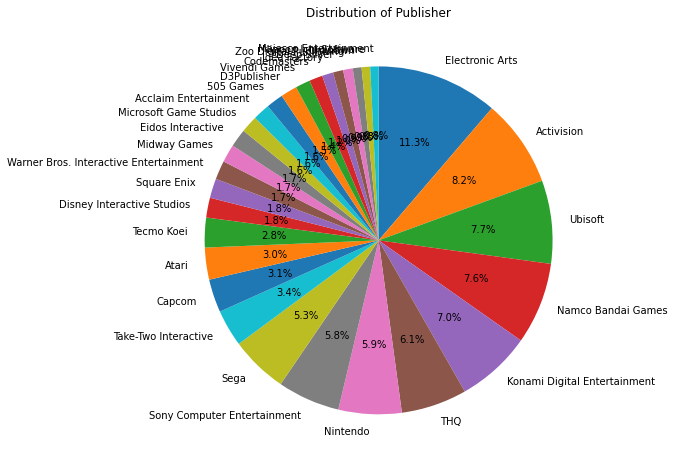

In [85]:
publisher_counts=df['Publisher'].value_counts()
labels=publisher_counts.index.tolist()
values=publisher_counts.values.tolist()

fig, ax= plt.subplots(figsize=(8,8))

ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False)

ax.set_title('Distribution of Publisher')

plt.show()

# Name 열 중복 값 합치기

In [86]:
df['Name'].value_counts()

Need for Speed: Most Wanted                                                                  12
Ratatouille                                                                                   9
FIFA 14                                                                                       9
LEGO Marvel Super Heroes                                                                      9
Madden NFL 07                                                                                 8
                                                                                             ..
The Sims 3: Barnacle Bay                                                                      1
World Championship Poker: Deluxe Series                                                       1
Crimson Gem Saga                                                                              1
Sony Computer Science Kenkyuujo Mogi Kenichirou Hakase Kanshuu: Nou ni Kaikan Aha Taiken!     1
The King of Fighters '95                

In [87]:
#   **keep=False **  /keep 기본옵션이 first, 중복된 첫번째를 삭제하고 가져오기때문에, false로 해주고 모두 가져와야한다
duplicates_df=df[df.duplicated(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], keep=False)]
duplicates_df.sort_values(by=['Name', 'Platform', 'Year', 'Genre', 'Publisher'])

duplicates_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4,Ben 10 Ultimate Alien: Cosmic Destruction,PlayStation,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
18,Grand Kingdom,PlayStation,2015.0,Role-Playing,Nippon Ichi Software,0.02,0.00,0.03,0.00
24,Injustice: Gods Among Us,PlayStation,2013.0,Fighting,Warner Bros. Interactive Entertainment,0.48,0.53,0.01,0.23
35,G-Force,Nintendo,2009.0,Action,Disney Interactive Studios,0.19,0.20,0.00,0.05
38,Ninja Reflex,Nintendo,2008.0,Action,Electronic Arts,0.11,0.01,0.00,0.01
...,...,...,...,...,...,...,...,...,...
16583,LEGO Indiana Jones 2: The Adventure Continues,Nintendo,2009.0,Action,Activision,0.91,0.39,0.00,0.13
16584,Bionicle Heroes,Nintendo,2006.0,Shooter,Eidos Interactive,0.06,0.00,0.00,0.00
16593,Ice Age 2: The Meltdown,Nintendo,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,NBA 2K16,PlayStation,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13


In [88]:
grouped_df=df.groupby(['Name', 'Platform', 'Year', 'Genre', 'Publisher']).sum()
grouped_df=grouped_df.reset_index()
grouped_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,.hack//G.U. Vol.1//Rebirth,PlayStation,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
1,.hack//G.U. Vol.2//Reminisce,PlayStation,2006.0,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03
2,.hack//G.U. Vol.2//Reminisce (jp sales),PlayStation,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00
3,.hack//G.U. Vol.3//Redemption,PlayStation,2007.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
4,.hack//Infection Part 1,PlayStation,2002.0,Role-Playing,Atari,0.49,0.38,0.26,0.13
...,...,...,...,...,...,...,...,...,...
10503,pro evolution soccer 2011,Xbox,2010.0,Sports,Konami Digital Entertainment,0.09,0.44,0.00,0.07
10504,uDraw Studio,Nintendo,2010.0,Misc,THQ,1.67,0.58,0.00,0.20
10505,uDraw Studio: Instant Artist,Nintendo,2011.0,Misc,THQ,0.08,0.09,0.00,0.02
10506,uDraw Studio: Instant Artist,Xbox,2011.0,Misc,THQ,0.01,0.01,0.00,0.00


In [89]:
grouped_df['Name'].value_counts()
# 이름 중복값 아직 존재

Need for Speed: Most Wanted              8
Rayman Origins                           6
Harry Potter and the Sorcerer's Stone    6
NBA Jam                                  6
Metro: Last Light                        5
                                        ..
InuYasha: Feudal Combat                  1
InuYasha: A Feudal Fairy Tale            1
International Track & Field 2000         1
International Track & Field              1
¡Shin Chan Flipa en colores!             1
Name: Name, Length: 7750, dtype: int64

In [90]:
# Need for Speed: Most Wanted 확인
need_check=grouped_df['Name'].str.contains('Need for Speed: Most Wanted')
grouped_df[need_check]

#플랫폼이 같아도 연도가 달라 합쳐지지않았음 - name, platform, year, genre, publisher 같은 항목은 합쳐짐

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6138,Need for Speed: Most Wanted,Nintendo,2005.0,Racing,Electronic Arts,0.86,0.19,0.00,0.04
6139,Need for Speed: Most Wanted,Nintendo,2013.0,Racing,Electronic Arts,0.14,0.12,0.00,0.02
6140,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05
6141,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.00,0.06,0.00,0.02
6142,Need for Speed: Most Wanted,PlayStation,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47
6143,Need for Speed: Most Wanted,PlayStation,2012.0,Racing,Electronic Arts,1.09,2.03,0.07,0.86
6144,Need for Speed: Most Wanted,Xbox,2005.0,Racing,Electronic Arts,1.53,0.63,0.02,0.15
6145,Need for Speed: Most Wanted,Xbox,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15
6146,Need for Speed: Most Wanted 5-1-0,PlayStation,2005.0,Racing,Electronic Arts,1.77,0.13,0.02,0.18


In [91]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10508 entries, 0 to 10507
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         10508 non-null  object 
 1   Platform     10508 non-null  object 
 2   Year         10508 non-null  float64
 3   Genre        10508 non-null  object 
 4   Publisher    10508 non-null  object 
 5   NA_Sales     10508 non-null  float64
 6   EU_Sales     10508 non-null  float64
 7   JP_Sales     10508 non-null  float64
 8   Other_Sales  10508 non-null  float64
dtypes: float64(5), object(4)
memory usage: 739.0+ KB


In [92]:
grouped_df.describe(include='all')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,10508,10508,10508.000000,10508,10508,10508.000000,10508.000000,10508.000000,10508.000000
unique,7750,5,NaN,12,30,NaN,NaN,NaN,NaN
top,Need for Speed: Most Wanted,PlayStation,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN
freq,8,4072,NaN,2179,1092,NaN,NaN,NaN,NaN
mean,NaN,NaN,2006.085554,NaN,NaN,0.363203,0.202776,0.096258,0.067069
...,...,...,...,...,...,...,...,...,...
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2003.000000,NaN,NaN,0.010000,0.000000,0.000000,0.000000
50%,NaN,NaN,2007.000000,NaN,NaN,0.110000,0.040000,0.000000,0.010000
75%,NaN,NaN,2010.000000,NaN,NaN,0.340000,0.160000,0.050000,0.050000


# =================시각화 시작 =================

In [93]:
## 1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
# ● 지역은 어떻게 구분했나요?  북미, 유럽, 일본, 기타
# ● 지역별로 선호하는 게임의 장르를 파악했나요?
# ● 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했나요?

In [94]:
# 장르에 대한 sales 합 구함
pivot_table=pd.pivot_table(df, values=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], index='Genre', aggfunc='sum')
column_order=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
pivot_table=pivot_table.reindex(columns=column_order)
pivot_table

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,743.39,456.97,129.33,165.20
Adventure,83.55,45.39,34.59,12.90
Fighting,198.24,89.43,68.74,33.04
Misc,335.73,183.88,83.98,64.56
Platform,420.84,185.75,125.89,48.22
...,...,...,...,...
Role-Playing,256.05,148.07,233.51,44.15
Shooter,518.62,274.94,34.70,91.98
Simulation,158.64,101.93,51.11,27.92


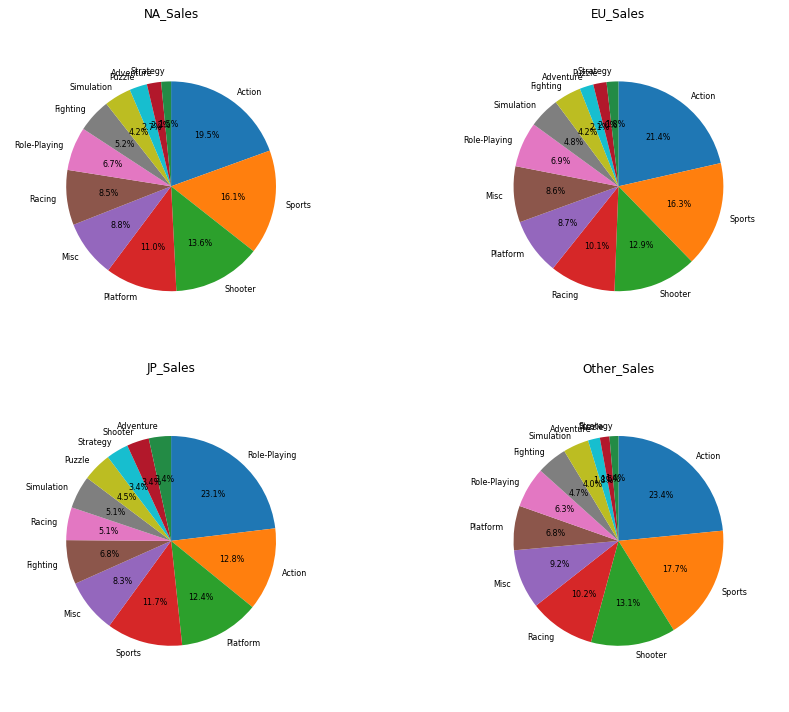

In [95]:
# 위 시각화 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#b2182b', '#238b45']
label_font={'fontsize': 8}

regions=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for i in range(2):
  for j in range(2):
    ax=axes[i,j]
    region=regions[2*i+j]
    sales=pivot_table[region]
    sales_sorted=sales.sort_values(ascending=False)
    labels= sales_sorted.index
    ax.pie(sales_sorted, labels=labels, autopct='%1.1f%%', counterclock=False, startangle=90, colors=colors, radius=0.8,textprops=label_font)
    ax.set_title(region)

plt.tight_layout()
plt.show()

#액션 게임이 우세함을 알 수 있다

In [96]:
pivot_table=pivot_table.reset_index()
pivot_table

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,743.39,456.97,129.33,165.20
1,Adventure,83.55,45.39,34.59,12.90
2,Fighting,198.24,89.43,68.74,33.04
3,Misc,335.73,183.88,83.98,64.56
4,Platform,420.84,185.75,125.89,48.22
...,...,...,...,...,...
7,Role-Playing,256.05,148.07,233.51,44.15
8,Shooter,518.62,274.94,34.70,91.98
9,Simulation,158.64,101.93,51.11,27.92
10,Sports,615.82,346.46,118.33,124.99


nlargest, nsmallest  데이터 오름차순/내림차순 정렬해, 위에서 n개의 행 출력하는 메서드

In [97]:
# 데이터 프레임을 만들고 옆에 붙여버리기

# 나라별 top5 장르
na_top_5 = pivot_table.nlargest(5, 'NA_Sales').iloc[:,0:2]
eu_top_5 = pivot_table.nlargest(5, 'EU_Sales').iloc[:, 0:3].drop('NA_Sales', axis=1)
jp_top_5 = pivot_table.nlargest(5, 'JP_Sales').iloc[:, 0:4].drop(['NA_Sales','EU_Sales'], axis=1)
other_top_5 = pivot_table.nlargest(5, 'Other_Sales').iloc[:, 0:5].drop(['NA_Sales','EU_Sales','JP_Sales'], axis=1)
na_top_5 = na_top_5.reset_index().iloc[:,1:]
eu_top_5 = eu_top_5.reset_index().iloc[:,1:]
jp_top_5 = jp_top_5.reset_index().iloc[:,1:]
other_top_5 = other_top_5.reset_index().iloc[:,1:]

total_value = pd.concat([na_top_5, eu_top_5, jp_top_5, other_top_5], axis=1)
total_value

,Genre,NA_Sales,Genre,EU_Sales,Genre,JP_Sales,Genre,Other_Sales
0,Action,743.39,Action,456.97,Role-Playing,233.51,Action,165.20
1,Sports,615.82,Sports,346.46,Action,129.33,Sports,124.99
2,Shooter,518.62,Shooter,274.94,Platform,125.89,Shooter,91.98
3,Platform,420.84,Racing,215.64,Sports,118.33,Racing,71.73
4,Misc,335.73,Platform,185.75,Misc,83.98,Misc,64.56


Text(0.5, 1.0, 'Video Game Sales by Region')

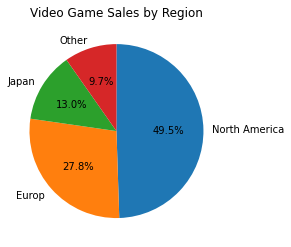

In [98]:
# 지역별 상위 5위 게임의 판매량 비율
na_sales=total_value['NA_Sales'].sum()
eu_sales=total_value['EU_Sales'].sum()
jp_sales=total_value['JP_Sales'].sum()
other_sales=total_value['Other_Sales'].sum()

# sales values 리스트, region labels 리스트 만들기
sales=[na_sales, eu_sales, jp_sales, other_sales]
regions=['North America', 'Europ', 'Japan', 'Other']
 # 파이차트
fig, ax=plt.subplots()
ax.pie(sales, labels=regions, autopct='%1.1f%%', startangle=90, counterclock=False)
ax.set_title('Video Game Sales by Region')

#판매량은 미국이 우세하다

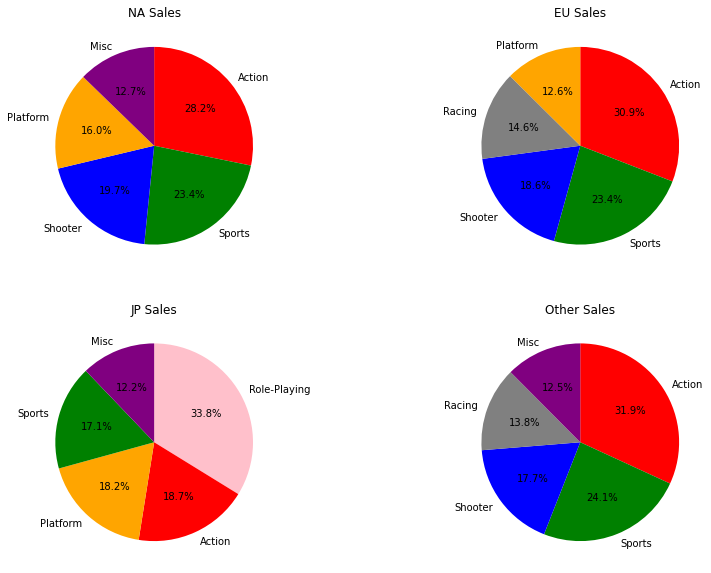

In [99]:
# 판매량, 각 카테고리로 정의하기
na_sales = total_value['NA_Sales'][:]
eu_sales = total_value['EU_Sales'][:]
jp_sales = total_value['JP_Sales'][:]
other_sales = total_value['Other_Sales'][:]

#각 카테고리, 라벨정의
na_labels = ['Action', 'Sports', 'Shooter', 'Platform', 'Misc']
eu_labels = ['Action', 'Sports', 'Shooter', 'Racing', 'Platform']
jp_labels = ['Role-Playing', 'Action', 'Platform', 'Sports', 'Misc']
other_labels = ['Action', 'Sports', 'Shooter', 'Racing', 'Misc']

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 카테고리별 색깔 설정
colors = {'Action': 'red', 'Sports': 'green', 'Shooter': 'blue', 'Platform': 'orange', 'Misc': 'purple', 'Racing': 'gray', 'Role-Playing': 'pink'}

# 각 카테고리, 파이차트
axs[0, 0].pie(na_sales, labels=na_labels, autopct='%1.1f%%', counterclock=False, startangle=90, colors=[colors[label] for label in na_labels])
axs[0, 0].set_title('NA Sales')

axs[0, 1].pie(eu_sales, labels=eu_labels, autopct='%1.1f%%', counterclock=False, startangle=90, colors=[colors[label] for label in eu_labels])
axs[0, 1].set_title('EU Sales')

axs[1, 0].pie(jp_sales, labels=jp_labels, autopct='%1.1f%%', counterclock=False, startangle=90, colors=[colors[label] for label in jp_labels])
axs[1, 0].set_title('JP Sales')

axs[1, 1].pie(other_sales, labels=other_labels, autopct='%1.1f%%', counterclock=False, startangle=90, colors=[colors[label] for label in other_labels])
axs[1, 1].set_title('Other Sales')

plt.show()


지역은 어떻게 구분하셨나요?
  - 북미, 유럽, 일본, 기타
지역별로 선호하는 게임의 장르를 파악했나요?
  -북미: 액션, 스포츠, 슈팅, 플랫폼, 기타
  -유럽: 액션, 스포츠, 슈팅, 레이싱, 플랫폼
  -일본: 롤플레잉, 액션, 플랫폼, 스포츠, 기타
  -기타: 액션, 스포츠, 슈팅, 레이싱, 기타

지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했나요?

지역별로 선호하는 게임은 다르다.
전체적으로 액션이 우세하긴하나, 일본같은 경우 롤플레잉이 상위에 위치한다
일본은 JRPG(japan role playing game)이 일본 문화와 밀접한 관련이 있어 인기가 많다

In [100]:
# 2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
# ● 트렌드는 어떤 것을 기준으로 파악했나요?
# ● 연도별로 트렌드가 존재하나요?
# ● 왜 존재한다/존재하지 않는다고 생각했나요?

In [101]:
# pivot table
df['Year']=df['Year'].astype(int)
pivot_table=pd.pivot_table(df, values=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                           index='Year', columns='Genre', aggfunc='sum')

pivot_table

<ipython-input-101-d1450c1329c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']=df['Year'].astype(int)


EU_Sales                                     ...  Other_Sales          \
Genre   Action Adventure Fighting   Misc Platform  ... Role-Playing Shooter   
Year                                               ...                        
1980      0.02       NaN     0.04   0.15      NaN  ...          NaN    0.08   
1981      0.21       NaN      NaN    NaN     0.29  ...          NaN    0.05   
1982      0.10       NaN      NaN    NaN     0.25  ...          NaN    0.05   
1983      0.14      0.02      NaN   0.00     0.43  ...          NaN    0.01   
1984      0.19       NaN      NaN   0.00     0.00  ...          NaN    0.50   
...        ...       ...      ...    ...      ...  ...          ...     ...   
2011     37.30      4.11     5.05  12.48     8.75  ...         2.29   10.10   
2012     39.21      0.19     2.21   6.41     5.83  ...         3.16    8.65   
2013     42.88      1.35     1.93   7.50     8.02  ...         2.03    6.69   
2014     38.01      0.40     3.05   5.93     3.63  ...         3.15    7.84   
2015     22.21      0.92     2.38   3.58     1.69  ...         1.78    8.36   

                                  
Genre Simulation Sports Strategy  
Year                              
1980         NaN    NaN      NaN  
1981        0.00   0.00      NaN  
1982         NaN   0.02      NaN  
1983         NaN   0.02      NaN  
1984         NaN   0.06      NaN  
...          ...    ...      ...  
2011        1.27   6.51     0.66  
2012        0.61   3.08     0.29  
2013        0.58   5.05     0.64  
2014        0.35   6.39     0.04  
2015        0.15   5.46     0.11  

[36 rows x 48 columns]

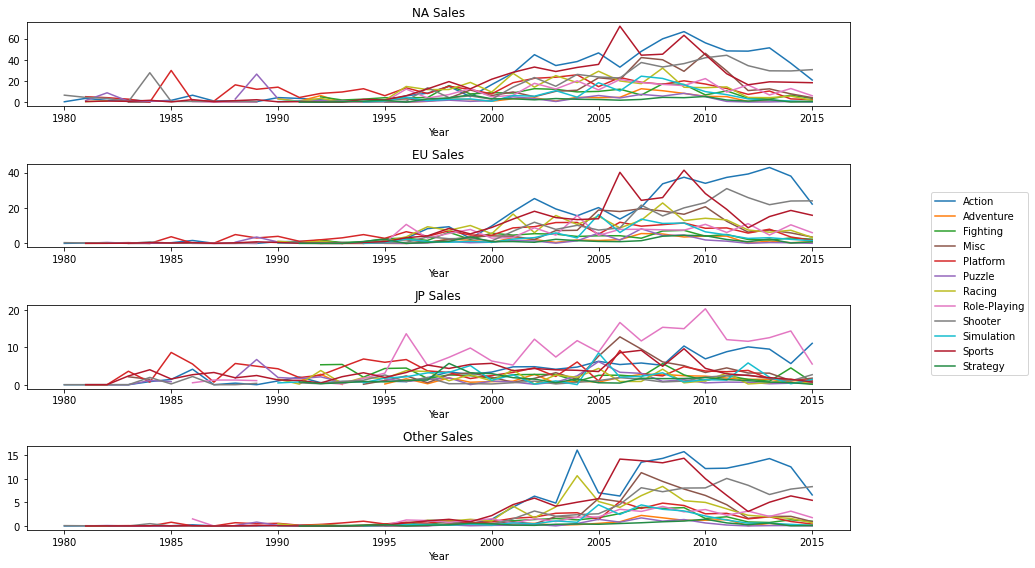

In [102]:
# 트렌드 시각화 -1
fig,axs=plt.subplots(nrows=4, figsize=(12,8))

all_colors={'Action': '#1f77b4', 'Adventure': '#ff7f0e', 'Fighting': '#2ca02c', 'Misc': '#8c564b',
              'Platform': '#d62728', 'Puzzle': '#9467bd', 'Racing': '#bcbd22', 'Role-Playing': '#e377c2',
              'Shooter': '#7f7f7f', 'Simulation': '#17becf', 'Sports': '#b2182b', 'Strategy': '#238b45'}

for i, region in enumerate(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']):
  pivot_table[region].plot(kind='line', ax=axs[i], color=[all_colors[genre] for genre in all_colors], legend=None)
  axs[i].set_title(region.split('_')[0] +' Sales')

fig.legend(labels=all_colors.keys(), loc='center right', bbox_to_anchor=(1.2, 0.5))

plt.tight_layout()
plt.show()

In [103]:
# 잘 모르겠음 - 시각화로 트렌드 알기 어려움

In [104]:
na_table = pivot_table['NA_Sales']
eu_table = pivot_table['EU_Sales']
jp_table = pivot_table['JP_Sales']
other_table = pivot_table['Other_Sales']

na_labels = ['Action', 'Sports', 'Shooter', 'Platform', 'Misc']
eu_labels = ['Action', 'Sports', 'Shooter', 'Racing', 'Platform']
jp_labels = ['Role-Playing', 'Action', 'Platform', 'Sports', 'Misc']
other_labels = ['Action', 'Sports', 'Shooter', 'Racing', 'Misc']

all_colors = {'Action': '#1f77b4', 'Adventure': '#ff7f0e', 'Fighting': '#2ca02c', 'Misc': '#8c564b', 
          'Platform': '#d62728', 'Puzzle': '#9467bd', 'Racing': '#bcbd22', 'Role-Playing': '#e377c2', 
          'Shooter': '#7f7f7f', 'Simulation': '#17becf', 'Sports': '#b2182b', 'Strategy': '#238b45'}

rank5_colors = {'Action': '#1f77b4', 'Misc': '#8c564b', 
          'Platform': '#d62728','Racing': '#bcbd22', 'Role-Playing': '#e377c2', 
          'Shooter': '#7f7f7f', 'Sports': '#b2182b'}

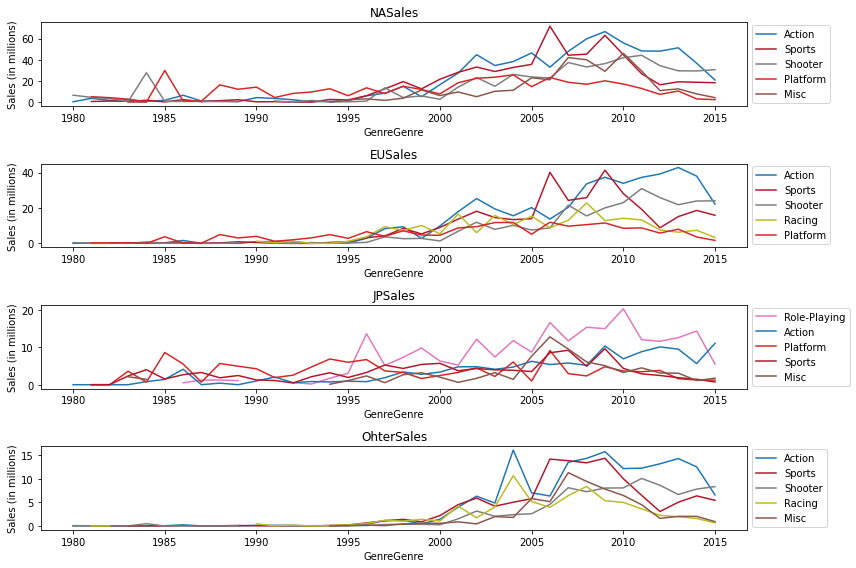

In [105]:
fig, axs = plt.subplots(nrows=4, figsize=(12,8))

for i, (table, labels) in enumerate(zip([na_table, eu_table, jp_table, other_table],
                                    [na_labels, eu_labels, jp_labels, other_labels])):
  for col in labels:
    table[col].plot(kind='line', ax=axs[i], color=all_colors[col], label=col)

  region = ['NA', 'EU', 'JP', 'Ohter']
  axs[i].set_title(region[i] + 'Sales')
  axs[i].set_xlabel(table.columns.name + 'Genre')
  axs[i].set_ylabel('Sales (in millions)')
  axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [106]:
# 시각화 -3
# 연도 기준으로 행의 최댓값을 1으로 변화하고 나머지는 0으로 전환하여 시각화 편하게 표현
for table in [na_table, eu_table, jp_table, other_table]:
  for year in eu_table.index: 
    max_sales = table.loc[year].max()
    table.loc[year]=table.loc[year].apply(lambda x: 1 if x==max_sales else 0)

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


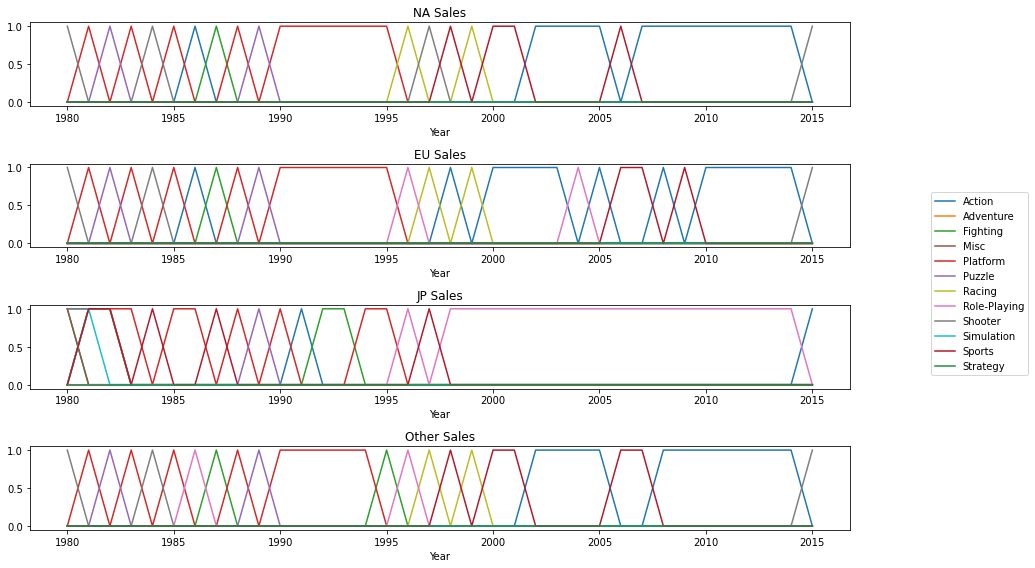

In [107]:
fig, axs = plt.subplots(nrows=4, figsize=(12,8))

all_colors = {'Action': '#1f77b4', 'Adventure': '#ff7f0e', 'Fighting': '#2ca02c', 'Misc': '#8c564b',
              'Platform': '#d62728', 'Puzzle': '#9467bd', 'Racing': '#bcbd22', 'Role-Playing': '#e377c2',
              'Shooter': '#7f7f7f', 'Simulation': '#17becf', 'Sports': '#b2182b', 'Strategy': '#238b45'}

for i, region in enumerate(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']):
    pivot_table[region].plot(kind='line', ax=axs[i], color=[all_colors[genre] for genre in all_colors], legend=None)
    axs[i].set_title(region.split('_')[0] + ' Sales')

fig.legend(labels=all_colors.keys(), loc='center right', bbox_to_anchor=(1.2, 0.5))

plt.tight_layout()
plt.show()

In [108]:
# 트렌드는 어떤 것을 기준으로 파악했나요?
#   - 각 국가별 연도별 최대 판매량
# 연도별로 트렌드 존재하나요?
#   -존재한다
# 왜 존재한다 생각했나요?
#   - 국가별로 1등 판매량을 보이는 장르를 보았을 때, 연도 별로 차이가 난다

인기가 많은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.¶

● 인기가 많다는 것을 어떻게 정의했나요?

● 해당 게임이 왜 인기가 많다고 생각했나요?

● 시각화를 통해 무엇을 나타내고자 하는지를 고려했나요?

● 해당 분석을 통해 어떤 인사이트를 도출할 수 있나요?

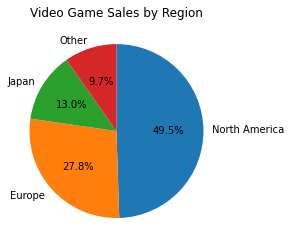

In [109]:
# 시장이 가장 큰 북미 시장을 공략해야한다

# 위의 코드 붙인 것 

#각 지역의 판매량 뽑아내기
na_sales = total_value['NA_Sales'].sum()
eu_sales = total_value['EU_Sales'].sum()
jp_sales = total_value['JP_Sales'].sum()
other_sales = total_value['Other_Sales'].sum()

# Create a list of sales values and a list of region labels
sales = [na_sales, eu_sales, jp_sales, other_sales]
regions = ['North America', 'Europe', 'Japan', 'Other']

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sales, labels=regions, autopct='%1.1f%%', startangle=90, counterclock=False)
ax.set_title('Video Game Sales by Region')

plt.show()

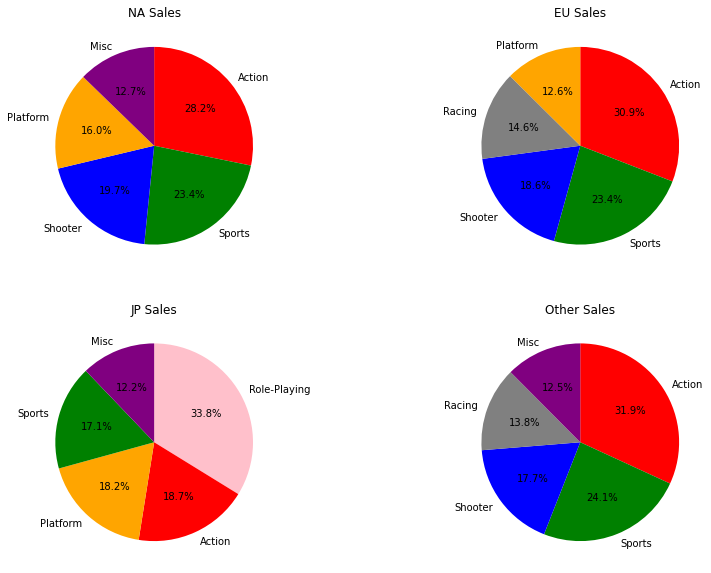

In [110]:
# 전 세계적으로 판매량이 높은 게임이 인가가 많다 --> 액션 장르의 게임


# 위 코드 복붙 

na_sales = total_value['NA_Sales'][:]
eu_sales = total_value['EU_Sales'][:]
jp_sales = total_value['JP_Sales'][:]
other_sales = total_value['Other_Sales'][:]

# Define the labels for each category
na_labels = ['Action', 'Sports', 'Shooter', 'Platform', 'Misc']
eu_labels = ['Action', 'Sports', 'Shooter', 'Racing', 'Platform']
jp_labels = ['Role-Playing', 'Action', 'Platform', 'Sports', 'Misc']
other_labels = ['Action', 'Sports', 'Shooter', 'Racing', 'Misc']

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Define colors for each category
colors = {'Action': 'red', 'Sports': 'green', 'Shooter': 'blue', 'Platform': 'orange', 'Misc': 'purple', 'Racing': 'gray', 'Role-Playing': 'pink'}

# Create pie charts for each category as subplots
axs[0, 0].pie(na_sales, labels=na_labels, autopct='%1.1f%%', counterclock=False, startangle=90, colors=[colors[label] for label in na_labels])
axs[0, 0].set_title('NA Sales')

axs[0, 1].pie(eu_sales, labels=eu_labels, autopct='%1.1f%%', counterclock=False, startangle=90, colors=[colors[label] for label in eu_labels])
axs[0, 1].set_title('EU Sales')

axs[1, 0].pie(jp_sales, labels=jp_labels, autopct='%1.1f%%', counterclock=False, startangle=90, colors=[colors[label] for label in jp_labels])
axs[1, 0].set_title('JP Sales')

axs[1, 1].pie(other_sales, labels=other_labels, autopct='%1.1f%%', counterclock=False, startangle=90, colors=[colors[label] for label in other_labels])
axs[1, 1].set_title('Other Sales')

plt.show()

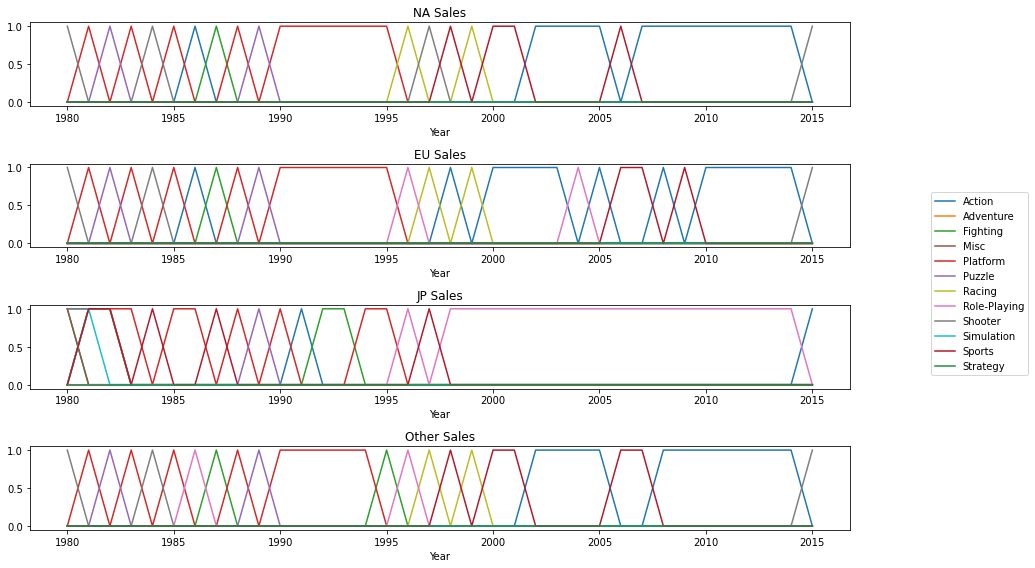

In [111]:
# 2010년 이후로 꾸준히 수요가 있는 액션 장르

# 위 복붙

fig, axs = plt.subplots(nrows=4, figsize=(12,8))

all_colors = {'Action': '#1f77b4', 'Adventure': '#ff7f0e', 'Fighting': '#2ca02c', 'Misc': '#8c564b',
              'Platform': '#d62728', 'Puzzle': '#9467bd', 'Racing': '#bcbd22', 'Role-Playing': '#e377c2',
              'Shooter': '#7f7f7f', 'Simulation': '#17becf', 'Sports': '#b2182b', 'Strategy': '#238b45'}

for i, region in enumerate(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']):
    pivot_table[region].plot(kind='line', ax=axs[i], color=[all_colors[genre] for genre in all_colors], legend=None)
    axs[i].set_title(region.split('_')[0] + ' Sales')

fig.legend(labels=all_colors.keys(), loc='center right', bbox_to_anchor=(1.2, 0.5))

plt.tight_layout()
plt.show()


# 플랫폼 추가 분석

In [112]:
platform_table = pd.pivot_table(df, values=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                                index='Year', columns='Platform', aggfunc='sum')
platform_table

EU_Sales                                  ... Other_Sales        \
Platform Nintendo Other     PC PlayStation   Xbox  ...    Nintendo Other   
Year                                               ...                     
1980          NaN  0.64    NaN         NaN    NaN  ...         NaN  0.11   
1981          NaN  0.95    NaN         NaN    NaN  ...         NaN  0.16   
1982          NaN  1.24    NaN         NaN    NaN  ...         NaN  0.24   
1983         0.46  0.31    NaN         NaN    NaN  ...        0.08  0.06   
1984         2.09  0.01    NaN         NaN    NaN  ...        0.70  0.00   
...           ...   ...    ...         ...    ...  ...         ...   ...   
2011        38.59   NaN  13.77       55.31  37.92  ...       10.63   NaN   
2012        25.06   NaN   9.45       44.41  32.14  ...        5.84   NaN   
2013        21.37   NaN   6.92       54.22  33.43  ...        4.30   NaN   
2014        16.76   NaN   6.05       62.30  29.27  ...        4.23   NaN   
2015        10.16   NaN   4.03       48.97  19.37  ...        2.32   NaN   

                                   
Platform    PC PlayStation   Xbox  
Year                               
1980       NaN         NaN    NaN  
1981       NaN         NaN    NaN  
1982       NaN         NaN    NaN  
1983       NaN         NaN    NaN  
1984       NaN         NaN    NaN  
...        ...         ...    ...  
2011      4.18       21.57  11.11  
2012      2.50       19.05   7.97  
2013      1.55       21.92   8.85  
2014      0.95       24.33   7.00  
2015      0.41       17.38   5.54  

[36 rows x 20 columns]

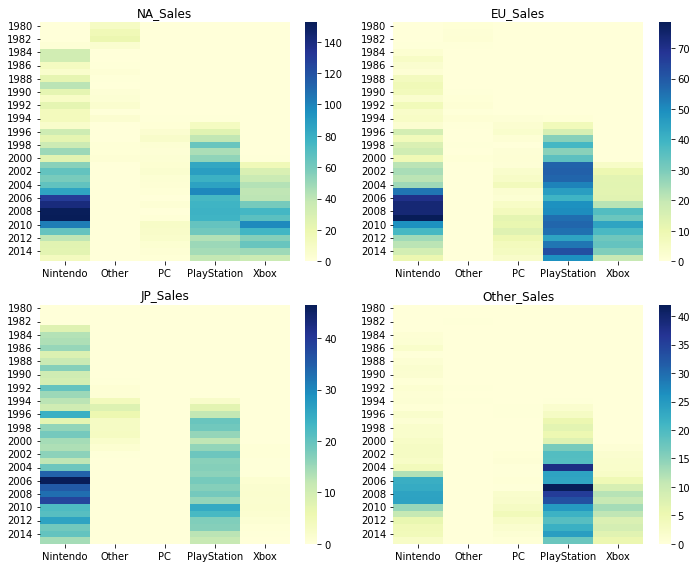

In [113]:
# 히트맵으로 시각화

platform_table = platform_table.fillna(0)

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(10,8))

sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col, ax in zip(sales_cols, axes.flatten()):
  sns.heatmap(data=platform_table[col], cmap= 'YlGnBu', ax=ax)
  ax.set_title(col)
  ax.set_xlabel('')
  ax.set_ylabel('')

fig.tight_layout()
plt.show()

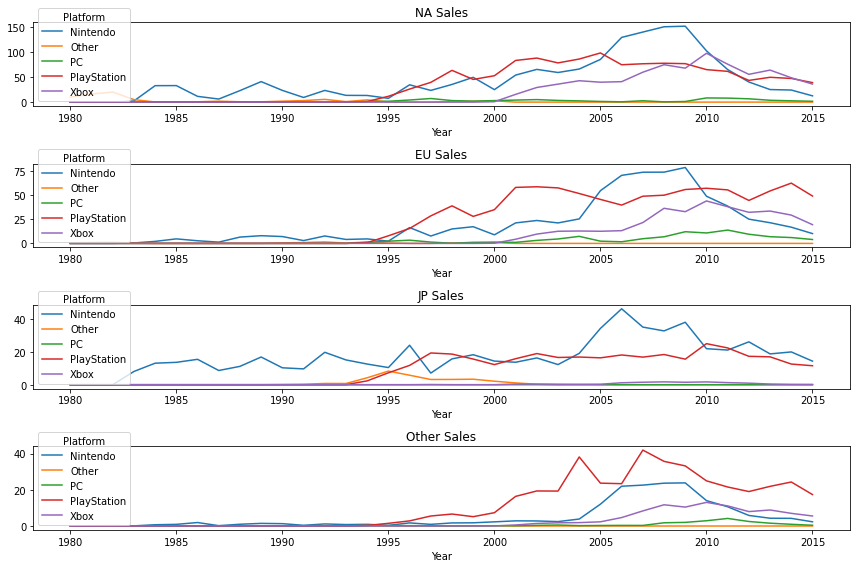

In [114]:
fig, axs= plt.subplots(nrows=4, figsize=(12,8))

for i, region in enumerate(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']):
  platform_table[region].plot(kind='line', ax=axs[i])
  axs[i].set_title(region.split('_')[0] + ' Sales')

plt.tight_layout()
plt.show()

In [115]:
# 플랫폼은 닌텐도와 플레이스테이션이 압도적으로 많이 사용한다
# 두개의 플랫폼 호환되는 방식으로 제작

